# Week 3 – Model Explainability using SHAP

### In this notebook, we focus on explaining the predictions of the baseline
### predictive maintenance model developed in Week 2.

###

### Explainability is especially critical in industrial maintenance systems,
### where predictions must be trusted and actionable by domain experts.

###

### The goal of this phase is to:
### - Understand which engineered features contribute most to failure prediction
### - Explain individual predictions at the machine level
### - Validate that model behavior aligns with expected degradation patterns
### 
### SHAP (SHapley Additive exPlanations) is used to provide both global and local
### interpretability by quantifying the contribution of each feature to a
### model’s prediction.

### The following sections demonstrate how SHAP is applied to interpret the
### trained LightGBM model.



In [2]:
import shap
shap.__version__


'0.50.0'

In [3]:
import pickle
import numpy as np
import pandas as pd
import shap


In [4]:
import joblib

FEATURES = joblib.load("../output/features.pkl")
type(FEATURES), len(FEATURES)


(list, 113)

In [5]:
final_model = joblib.load("../output/final_model.pkl")
final_model
type(final_model)


lightgbm.sklearn.LGBMClassifier

In [6]:
import pandas as pd

df = pd.read_csv("../data/processed/processed_data.csv")

X = df[FEATURES]
y = df["label_24"]


X_scaled


## SHAP Explainer Selection
####
#### The final trained model is a LightGBM classifier, which is a tree-based model.
#### Therefore, SHAP TreeExplainer is used to compute exact SHAP values for both global and local model explanations.
#### Note: Feature scaling is not applied here since tree-based models
#### (LightGBM) are scale-invariant and SHAP expects raw feature values.





In [7]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)


/opt/anaconda3/lib/python3.13/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [8]:
# LightGBM returns a list for binary classification
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # positive (failure) class
else:
    shap_values_to_plot = shap_values


## Global Feature Importance Analysis

#### This section analyzes the overall influence of engineered features on the
#### model’s predictions across the entire dataset.


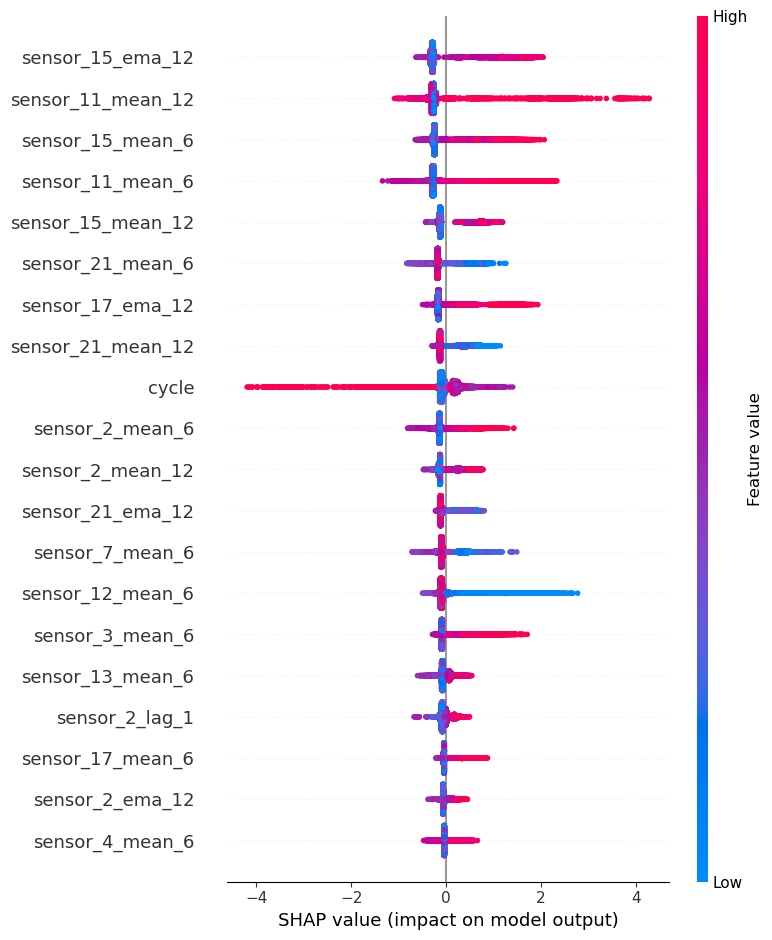

In [10]:
shap.summary_plot(
    shap_values_to_plot,
    X,
    feature_names=FEATURES
)


### Interpretation
###
#### - Rolling-window sensor features show the highest global importance.
#### - Lag-based features help capture short-term degradation behavior.
#### - Operational setting features have relatively lower impact.

#### These results align with expected predictive maintenance patterns.


## Local Explanation of an Individual Prediction

#### Local explanations help understand why a specific engine instance is classified
#### as high-risk or low-risk at a particular cycle.


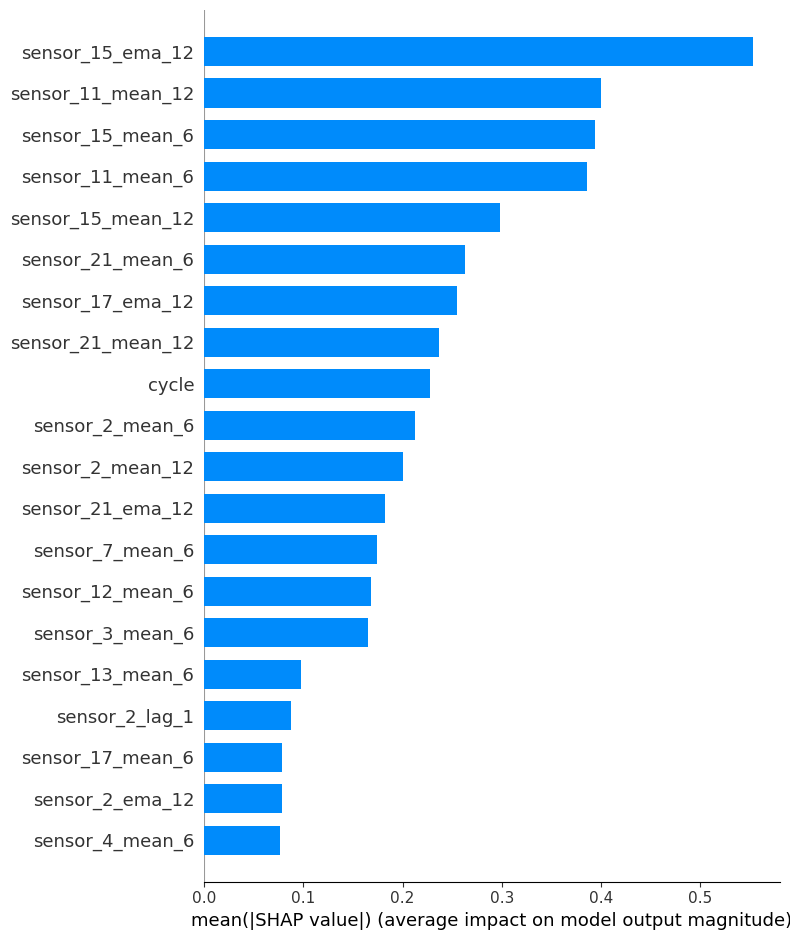

In [11]:
shap.summary_plot(
    shap_values_to_plot,
    X,
    feature_names=FEATURES,
    plot_type="bar"
)


### Interpretation

#### - Features pushing the prediction toward failure are highlighted in red.
#### - Features supporting normal operation appear in blue.
#### - Multiple sensor deviations combine to influence the final prediction.


## Key Takeaways from Explainability Analysis

#### - SHAP confirms that the model relies on meaningful sensor degradation signals.
#### - Both global and local explanations increase trust in model predictions.
#### - The explainability analysis supports deployment in real-world industrial
####  predictive maintenance systems.

